In [40]:
import nltk
from nltk import FreqDist
from nltk.tokenize import word_tokenize
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords
print("Import Successful")

Import Successful


In [41]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

{'m', 's', 'in', 'be', 'ours', "shouldn't", "hasn't", 'won', 'theirs', 'wasn', 'y', 'yourselves', "wasn't", "she's", 'through', 'aren', 'doesn', 'o', 'themselves', 'below', 'didn', "haven't", "won't", 'did', 'how', 'then', 'a', 'more', "hadn't", 'don', 'isn', 'him', "didn't", 'where', 'no', 'before', 'me', 'it', 'she', 've', 'has', 'as', 'will', 'now', 'they', 'up', 'why', 'these', 'can', 'same', 'd', "couldn't", 'when', 're', 'down', "don't", 'while', 'during', 'out', 'not', "shan't", 'between', 'own', "doesn't", 'herself', 'from', 'were', 'under', 'on', 'needn', 'this', 'that', 'other', 't', 'her', 'because', 'each', 'couldn', 'does', 'i', 'against', 'here', 'until', 'by', 'he', "that'll", 'weren', 'above', 'your', "aren't", 'such', "you'd", 'haven', 'into', 'few', 'too', 'is', "isn't", 'hasn', 'whom', 'both', 'to', 'so', 'ain', 'myself', 'of', 'mustn', 'or', 'further', 'again', 'itself', 'very', 'its', 'you', 'should', 'have', 'yourself', "weren't", "you'll", 'had', 'hers', 'their',

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/revathy/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [64]:
# Open and read the file
df = pd.read_csv('annotations_combined_v2.csv')
##creation of training data
Instructions = list(df['instructions'])
Verbs = list(df['Verbs'])
data = []
for i in range(0,len(Instructions)):
    verb_ = Verbs[i]
    verbs = []
    if not isinstance(verb_, str): # To catch the Nan values
        verb_ = 'none'
    verb_ = verb_.split(',')
    for v in verb_:
        temp = word_tokenize(v)
        verbs = verbs + temp
    instruction = Instructions[i]
    # Lower case everything
    if not isinstance(instruction, str):
        instruction = "none"
    else:
        instruction = instruction.lower()
#     tokens = word_tokenize(instruction)
    cooking_verbs = [v.lower() for v in verbs]
#     inst_tokens = [t.lower() for t in tokens]

    data.append((instruction, cooking_verbs))

In [67]:
inst_corpus = ''
cooking_action_corpus = []
for inst, ca in data:
#     print(ca)
    inst_corpus = inst_corpus + inst
    cooking_action_corpus = cooking_action_corpus + ca


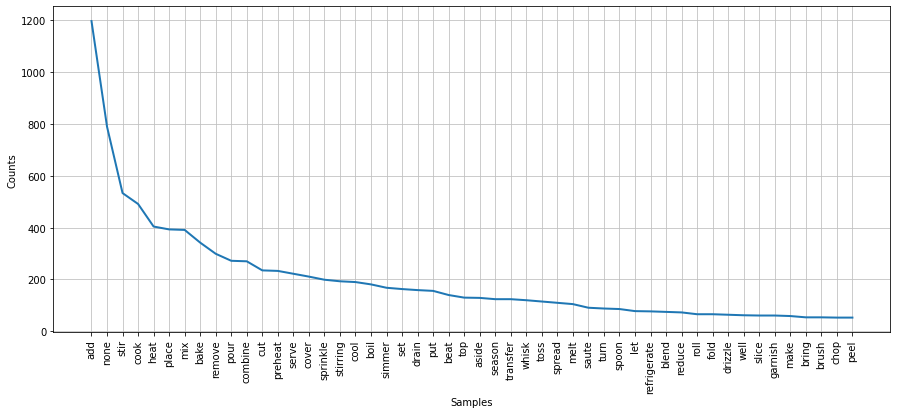

<AxesSubplot: xlabel='Samples', ylabel='Counts'>

In [69]:
# read in the corpus

corpus = " ".join(cooking_action_corpus)
# print(corpus)

custom_stopwords = {".",",", ")", "(", "the", "a", "is", "1", "2", "3", "4", "5", "6", "7", "8", "9", "10", "15", ":", "*", "&", "!"}
stopwords = set(custom_stopwords).union(set(stop_words))

# tokenize the corpus into words
tokens = word_tokenize(corpus)
filtered_tokens = [token for token in tokens if not token.lower() in stopwords]


# words = [word for word in tokens if word != ',']
# text = ' '.join(words)

# create a frequency distribution object
fdist = FreqDist(filtered_tokens)


plt.figure(figsize=(15, 6))
# plot the frequency distribution graph
fdist.plot(50, cumulative=False)

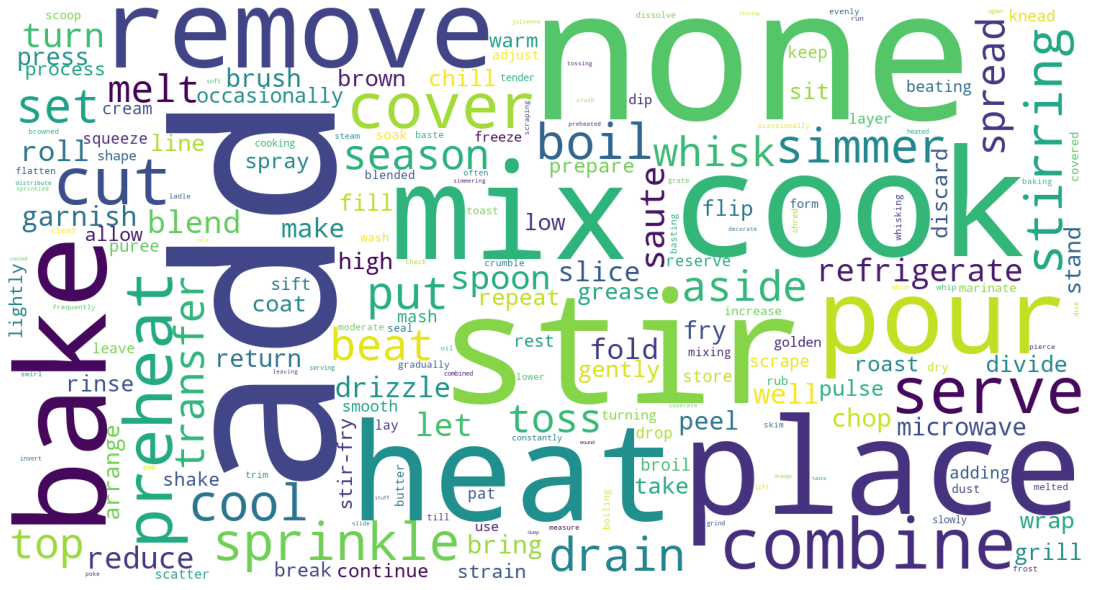

In [70]:
# generate the word cloud
wordcloud = WordCloud(width=1500, height=800, background_color='white').generate_from_frequencies(fdist)

# display the word cloud
plt.figure(figsize=(15, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()